# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os
from FACET.Facet import Facet
os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))

eegDataSet = "NiazyFMRI.edf"
#eegDataSet = "C:\\Users\\janik\\Downloads\\FMRIB_Data.set\\eegNiazy.edf"

f = Facet()


## Second Step import EEG Data

In [2]:
f.import_EEG(eegDataSet, rel_trig_pos=-0.01, bads=['EMG', 'ECG'])
f.find_triggers(r'\b1\b')
eeg = f.get_EEG()
#print triggers
print(eeg["triggers"])
event_id={'trigger':1}
f.export_as_bids(event_id)
f.import_from_bids(rel_trig_pos=-0.01, bads=['EMG', 'ECG'])
eeg = f.get_EEG()
#print channels
print(eeg["raw"].ch_names)

f.plot_EEG(title="after import")

Importing EEG with:
Channels ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
Time Start: 0.0s
Time End: 162.99951171875s
Number of Samples: 333824
Sampling Frequency: 2048.0Hz
NiazyFMRI.edf
Stim-Kanäle gefunden: ['Status']
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
finding triggers
[58886, 59178, 59470, 59762, 60054, 60346, 60638, 60931, 61223, 61515, 61807, 62099, 62391, 62683, 62975, 63268, 63560, 63852, 64144, 64436, 64728, 65030, 65323, 65615, 65907, 66199, 66491, 66783, 67075, 67367, 67659, 67952, 68244, 68536, 68828, 69120, 69412, 69704, 69996, 70288, 70581, 70873, 71175, 71467, 71759, 72051, 72344, 72636, 72928,

## Third Step Preprocessing

In [3]:
f.pre_processing()


Applying highpassfilter
Upsampling Data


## Fourth Step find triggers

In [4]:

f.find_triggers(r'\btrigger\b', idx=0) # Using Niazys data
eeg = f.get_EEG()
#print triggers
print(eeg["triggers"])
#f.cut()

#f.find_triggers(r'.*TR.*') # Using Fischmeisters data

No Stim-Channels found.

{'trigger': 1}
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']
finding triggers
[588860, 591780, 594700, 597620, 600540, 603460, 606380, 609310, 612230, 615150, 618070, 620990, 623910, 626830, 629750, 632680, 635600, 638520, 641440, 644360, 647280, 650300, 653230, 656150, 659070, 661990, 664910, 667830, 670750, 673670, 676590, 679520, 682440, 685360, 688280, 691200, 694120, 697040, 699960, 702880, 705810, 708730, 711750, 714670, 717590, 720510, 723440, 726360, 729280, 732200, 735120, 738040, 740960, 743880, 746800, 749730, 752650, 755570, 758490, 761410, 764330, 767250, 770170, 773200, 776120, 779040, 781960, 784880, 787800, 790720, 793650, 796570, 799490, 802410, 805330, 808250, 811170, 814090, 817010, 819940, 822860, 825780, 828700, 831620, 834640, 837560, 840490, 843410, 8

## Fourth step apply AAS

In [5]:
f.apply_Moosmann(file_path="d_sub-xp101_task-eegfmriNF_headmotion.tsv", threshold=0.8)

## Fifth step Remove Artifacts

In [6]:
f.remove_artifacts( )
eeg = f.get_EEG()
#print triggers
print(eeg["triggers"])



Removing Artifact from Channel 0 
Removing Artifact from Channel 1 
Removing Artifact from Channel 2 
Removing Artifact from Channel 3 
Removing Artifact from Channel 4 
Removing Artifact from Channel 5 
Removing Artifact from Channel 6 
Removing Artifact from Channel 7 
Removing Artifact from Channel 8 
Removing Artifact from Channel 9 
Removing Artifact from Channel 10 
Removing Artifact from Channel 11 
Removing Artifact from Channel 12 
Removing Artifact from Channel 13 
Removing Artifact from Channel 14 
Removing Artifact from Channel 15 
Removing Artifact from Channel 16 
Removing Artifact from Channel 17 
Removing Artifact from Channel 18 
Removing Artifact from Channel 19 
Removing Artifact from Channel 20 
Removing Artifact from Channel 21 
Removing Artifact from Channel 22 
Removing Artifact from Channel 23 
Removing Artifact from Channel 24 
Removing Artifact from Channel 25 
Removing Artifact from Channel 26 
Removing Artifact from Channel 27 
Removing Artifact from Channel

## Sixth step Post-Processing

In [7]:
f.downsample()
f.plot_EEG( title="after downsampling")
f.lowpass(h_freq=40)

Downsampling Data
Applying lowpassfilter


## Seventh display the processed eeg data

In [8]:
f.plot_EEG(title="after lowpass")
f.export_EEG("NiazyFMRI_pyFacet_cleaned.edf")

## Eighth Evaluate Results

No Stim-Channels found.

{'trigger': 1}
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']
finding triggers
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']


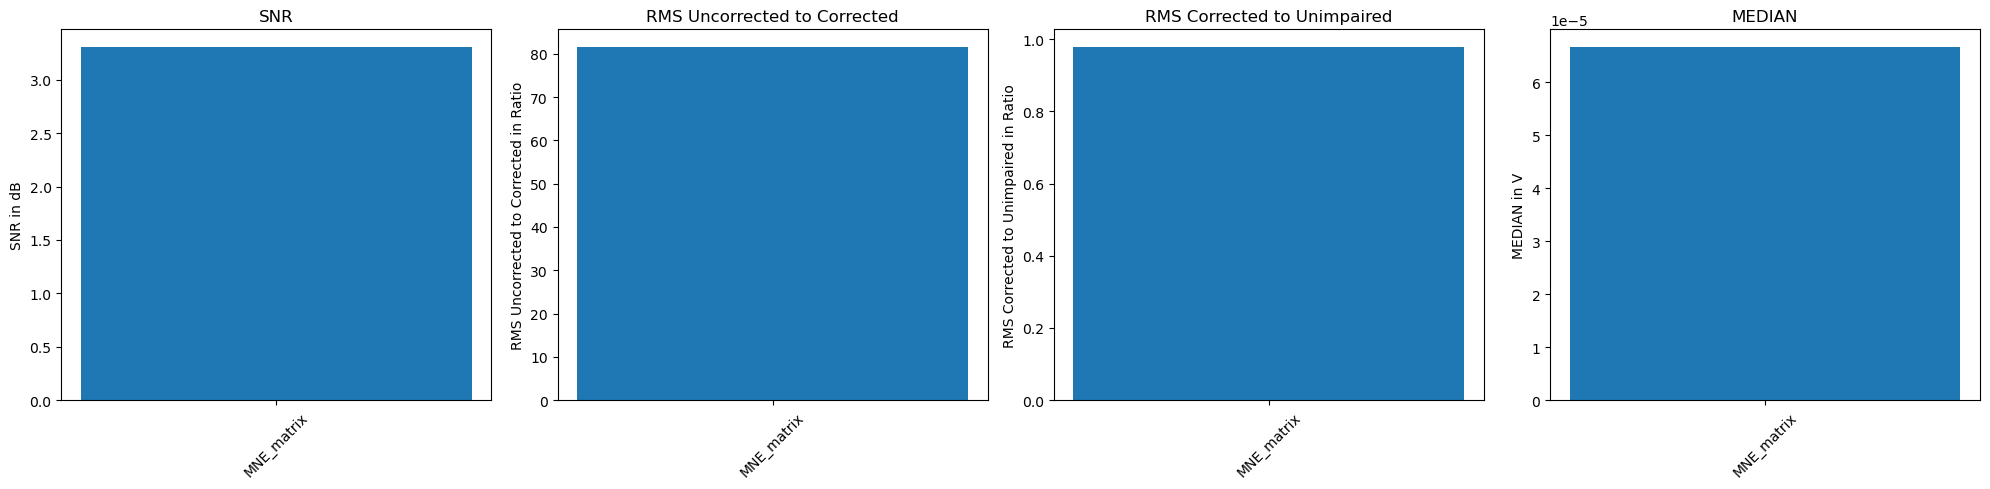

[{'Measure': 'SNR', 'Values': [3.307108012470869], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [81.55219404859265], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [0.9782878123478393], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [6.66074846739892e-05], 'Unit': 'V'}]
Exporting Channels: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']


In [9]:
f.find_triggers(r'\btrigger\b') # Using Niazys data
eeg_python = f.get_eeg()
f.add_to_evaluate(eeg_python, name="MNE_matrix") # Matrix will result in >1.0 RMS2 because of python mne inaccuracies



results = f.evaluate(plot=True,measures=["SNR", "RMS", "RMS2", "MEDIAN"])
print(results)

f.export_as_bids(event_id=event_id)

